# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [37]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
from wordcloud import WordCloud
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
load_dotenv()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\bfode\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [38]:
# Read your api key environment variable
# YOUR CODE HERE!
api_key = os.getenv("news_api")

In [39]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient(api_key=api_key)

In [40]:
print(api_key)

acb2160c0f6a48f18fb0a2b0e6bc2a9f


In [41]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
bitcoin_news = newsapi.get_everything(q="bitcoin")
bitcoin_news["totalResults"]


# Print total articles
print(f"Total Bitcoin news articles: {bitcoin_news['totalResults']}")

bitcoin_news["articles"][3]

Total Bitcoin news articles: 19432


{'source': {'id': 'the-verge', 'name': 'The Verge'},
 'author': 'Chaim Gartenberg',
 'title': 'Coinbase is down amid massive cryptocurrency plunge',
 'description': 'Cryptocurrency exchange Coinbase is experiencing a partial outage amid a massive plummet in cryptocurrencies (including Bitcoin, Etherium, and Dogecoin).',
 'url': 'https://www.theverge.com/2021/5/19/22443701/coinbase-outage-bitcoin-ethereum-price-falling-cryptocurrency',
 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/9inLHdPYtMB1pyO936DAKt3d7b4=/0x215:3000x1786/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/8954807/acastro_170726_1777_0008.jpg',
 'publishedAt': '2021-05-19T13:47:36Z',
 'content': 'Illustration by Alex Castro / The Verge\r\n\n \n\n Cryptocurrency exchange Coinbase is experiencing a “partial” outage this morning for its entire site and application. Additionally, both Coinbase and Bin… [+1307 chars]'}

In [42]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
ethereum_news = newsapi.get_everything(q="ethereum")
ethereum_news["totalResults"]


# Print total articles
print(f"Total Ethereum news articles: {ethereum_news['totalResults']}")

ethereum_news["articles"][3]

Total Ethereum news articles: 7859


{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Lucas Matney',
 'title': 'Bitcoin crashes as investors fear crypto bull market could be nearing its end',
 'description': 'Bitcoin, Ethereum and a host of Altcoins suffered massive drops Tuesday night and Wednesday morning, erasing months of gains and hundreds of billions in market cap. The overall crypto market shrunk more than 20% over the past 24 hours according to crypto trac…',
 'url': 'http://techcrunch.com/2021/05/19/bitcoin-crashes-as-investors-fear-crypto-bull-market-could-be-nearing-its-end/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2016/02/shutterstock_121576933.jpg?w=711',
 'publishedAt': '2021-05-19T16:05:22Z',
 'content': 'Bitcoin, Ethereum and a host of Altcoins suffered massive drops Tuesday night and Wednesday morning, erasing months of gains and hundreds of billions in market cap. The overall crypto market shrunk m… [+1182 chars]'}

In [43]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
bitcoin_sentiments = []

for article in bitcoin_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu,
            "text": text,
            
        })
        
    except AttributeError:
        pass
    
cols = ["compound", "negative", "neutral", "positive", "text",]
bitcoin_df = bitcoin_df[cols]


bitcoin_df = pd.DataFrame(bitcoin_sentiments)
bitcoin_df.head()

,compound,positive,negative,neutral,text
0,0.3818,0.071,0.00,0.929,Just weeks after Tesla started accepting Bitco...
1,0.2960,0.058,0.00,0.942,Shares of Square are up more than 6% today aft...
2,0.4939,0.134,0.05,0.816,Image: Tesla\r\n\n \n\n Tesla has stopped acce...
3,0.0000,0.000,0.00,1.000,Illustration by Alex Castro / The Verge\r\n\n ...
4,0.4754,0.075,0.00,0.925,"Last week, whenElon Musk tweeted that he had s..."


In [44]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
ethereum_sentiments = []

for article in ethereum_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu,
            "text": text,
            
        })
        
    except AttributeError:
        pass
    
cols = ["compound", "negative", "neutral", "positive", "text",]
ethereum_df = ethereum_df[cols]


ethereum_df = pd.DataFrame(ethereum_sentiments)
ethereum_df.head()


,compound,positive,negative,neutral,text
0,0.2263,0.060,0.000,0.940,"Vitalik Buterin, the creator of Ethereum, on W..."
1,-0.4019,0.072,0.150,0.778,Their investors call them disruptive innovator...
2,0.4019,0.083,0.000,0.917,Solana isn’t known yet outside of the crypto c...
3,-0.2023,0.066,0.087,0.847,"Bitcoin, Ethereum and a host of Altcoins suffe..."
4,0.0000,0.000,0.000,0.000,


In [45]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.171110,0.077250,0.042100,0.880700
std,0.474856,0.075344,0.050826,0.076843
min,-0.762700,0.000000,0.000000,0.736000
25%,-0.050575,0.000000,0.000000,0.820750
50%,0.273000,0.070000,0.025000,0.886500
75%,0.513100,0.140250,0.073500,0.929000
max,0.845500,0.217000,0.180000,1.000000


In [46]:
# Describe the Ethereum Sentiment`
# YOUR CODE HERE!
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.00000
mean,0.098670,0.054650,0.024500,0.87085
std,0.316484,0.056688,0.047668,0.21820
min,-0.401900,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.84300
50%,0.025800,0.049000,0.000000,0.93300
75%,0.254725,0.074500,0.011750,0.97150
max,0.817600,0.210000,0.150000,1.00000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin has the highest mean positive score

Q: Which coin had the highest compound score?

A: Bitcoin has the highest compound score.

Q. Which coin had the highest positive score?

A: Bitcoin has the highest positive score.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [47]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [51]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!
stopWords = set(stopwords.words('english'))
print(len(stopWords))
print(stopWords)

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

179
{'yourselves', "wouldn't", 'just', 'o', 'above', 'hasn', "won't", 'my', 'such', 'aren', 'itself', 'on', 'who', 'its', 'some', 'does', 'themselves', 'off', 'under', 'again', 'having', 'our', 'few', 'i', 'had', 'shouldn', 'because', 'before', 'been', "you'd", 'is', 'as', 'needn', 'these', 'your', 'will', 'being', 'with', 'what', 'weren', 'both', 'after', 'than', 'if', "mustn't", "shan't", "you've", 'herself', 'so', 'or', "haven't", 'doing', 'she', 'yourself', 'a', 'we', 'their', 'about', 'was', 'ain', 'in', 'm', "she's", 'hadn', "wasn't", 'that', 'myself', 'against', 'between', "needn't", 'until', 'each', 'once', 'were', 'further', "it's", 'mustn', 'here', "that'll", "should've", "you're", 'ma', 're', 'whom', 'you', "hasn't", 'down', 'd', 'by', "couldn't", 'ours', 'when', 'own', 'he', 'should', "doesn't", 'do', "shouldn't", 'out', 'wasn', 'over', "isn't", 'which', 'very', 'has', 'from', 'it', 'all', 'll', 'an', 'and', 'through', 'doesn', 'for', 'there', 'below', 'most', 'while', 'our

In [53]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    # Remove the stop words
    output = [word.lower() for word in lem if word.lower() not in stopWords]
    
    return output
    
    
    
    

In [57]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
bitcoin_df['tokens'] = bitcoin_df.text.apply(tokenizer)
bitcoin_df.head()

,compound,positive,negative,neutral,text,tokens
0,0.3818,0.071,0.00,0.929,Just weeks after Tesla started accepting Bitco...,"[week, tesla, started, accepting, bitcoin, cur..."
1,0.2960,0.058,0.00,0.942,Shares of Square are up more than 6% today aft...,"[shares, square, today, american, fintech, com..."
2,0.4939,0.134,0.05,0.816,Image: Tesla\r\n\n \n\n Tesla has stopped acce...,"[image, tesla, tesla, ha, stopped, accepting, ..."
3,0.0000,0.000,0.00,1.000,Illustration by Alex Castro / The Verge\r\n\n ...,"[illustration, alex, castro, verge, cryptocurr..."
4,0.4754,0.075,0.00,0.925,"Last week, whenElon Musk tweeted that he had s...","[last, week, whenelon, musk, tweeted, spoken, ..."


In [58]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
ethereum_df['tokens'] = ethereum_df.text.apply(tokenizer)
ethereum_df.head()

,compound,positive,negative,neutral,text,tokens
0,0.2263,0.060,0.000,0.940,"Vitalik Buterin, the creator of Ethereum, on W...","[vitalik, buterin, creator, ethereum, wednesda..."
1,-0.4019,0.072,0.150,0.778,Their investors call them disruptive innovator...,"[investor, call, disruptive, innovator, detrac..."
2,0.4019,0.083,0.000,0.917,Solana isn’t known yet outside of the crypto c...,"[solana, isnt, known, yet, outside, crypto, co..."
3,-0.2023,0.066,0.087,0.847,"Bitcoin, Ethereum and a host of Altcoins suffe...","[bitcoin, ethereum, host, altcoins, suffered, ..."
4,0.0000,0.000,0.000,0.000,,[]


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [59]:
from collections import Counter
from nltk import ngrams

In [65]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!

processed = tokenizer(bitcoin_df.text.str.cat())

bigram_counts = Counter(ngrams(processed, n=2))
print(dict(bigram_counts))

{('week', 'tesla'): 1, ('tesla', 'started'): 1, ('started', 'accepting'): 1, ('accepting', 'bitcoin'): 4, ('bitcoin', 'currency'): 1, ('currency', 'car'): 1, ('car', 'elon'): 1, ('elon', 'musk'): 6, ('musk', 'revealed'): 1, ('revealed', 'tweet'): 1, ('tweet', 'suspend'): 1, ('suspend', 'effort'): 1, ('effort', 'according'): 1, ('according', 'release'): 1, ('release', 'tesla'): 1, ('tesla', 'doe'): 1, ('doe', 'appear'): 1, ('appear', 'funct'): 1, ('funct', 'charsshares'): 1, ('charsshares', 'square'): 1, ('square', 'today'): 1, ('today', 'american'): 1, ('american', 'fintech'): 1, ('fintech', 'company'): 1, ('company', 'reported'): 1, ('reported', 'staggering'): 1, ('staggering', 'billion'): 1, ('billion', 'revenue'): 1, ('revenue', 'q'): 1, ('q', 'earnings'): 1, ('earnings', 'report'): 1, ('report', 'far'): 1, ('far', 'ahead'): 1, ('ahead', 'expected'): 1, ('expected', 'tally'): 1, ('tally', 'bi'): 1, ('bi', 'charsimage'): 1, ('charsimage', 'tesla'): 1, ('tesla', 'tesla'): 1, ('tesla',

In [68]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
processed_eth = tokenizer(ethereum_df.text.str.cat())

bigram_counts_eth = Counter(ngrams(processed_eth, n=2))
print(dict(bigram_counts_eth))

{('vitalik', 'buterin'): 2, ('buterin', 'creator'): 1, ('creator', 'ethereum'): 1, ('ethereum', 'wednesday'): 1, ('wednesday', 'donated'): 1, ('donated', 'ethereum'): 1, ('ethereum', 'meme'): 1, ('meme', 'coin'): 1, ('coin', 'worth'): 1, ('worth', 'billion'): 1, ('billion', 'one'): 1, ('one', 'largestever'): 1, ('largestever', 'individual'): 1, ('individual', 'philanthropy'): 1, ('philanthropy', 'effortsbuterin'): 1, ('effortsbuterin', 'transferred'): 1, ('transferred', 'eth'): 1, ('eth', 'charstheir'): 1, ('charstheir', 'investor'): 1, ('investor', 'call'): 1, ('call', 'disruptive'): 1, ('disruptive', 'innovator'): 1, ('innovator', 'detractors'): 1, ('detractors', 'like'): 1, ('like', 'north'): 1, ('north', 'carolina'): 1, ('carolina', 'attorney'): 1, ('attorney', 'general'): 1, ('general', 'josh'): 1, ('josh', 'stein'): 1, ('stein', 'call'): 1, ('call', 'dirty'): 1, ('dirty', 'scammer'): 1, ('scammer', 'leda'): 1, ('leda', 'health'): 1, ('health', 'cofounder'): 1, ('cofounder', 'madi

In [71]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [72]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
token_count(processed, N=10)

[('bitcoin', 11),
 ('musk', 9),
 ('tesla', 7),
 ('elon', 7),
 ('week', 6),
 ('crypto', 6),
 ('company', 5),
 ('ha', 5),
 ('accepting', 4),
 ('cryptocurrency', 4)]

In [73]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
token_count(processed_eth, N=10)

[('ethereum', 12),
 ('currency', 8),
 ('ha', 5),
 ('representation', 5),
 ('virtual', 5),
 ('seen', 5),
 ('front', 5),
 ('stock', 5),
 ('graph', 5),
 ('illustration', 5)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [74]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

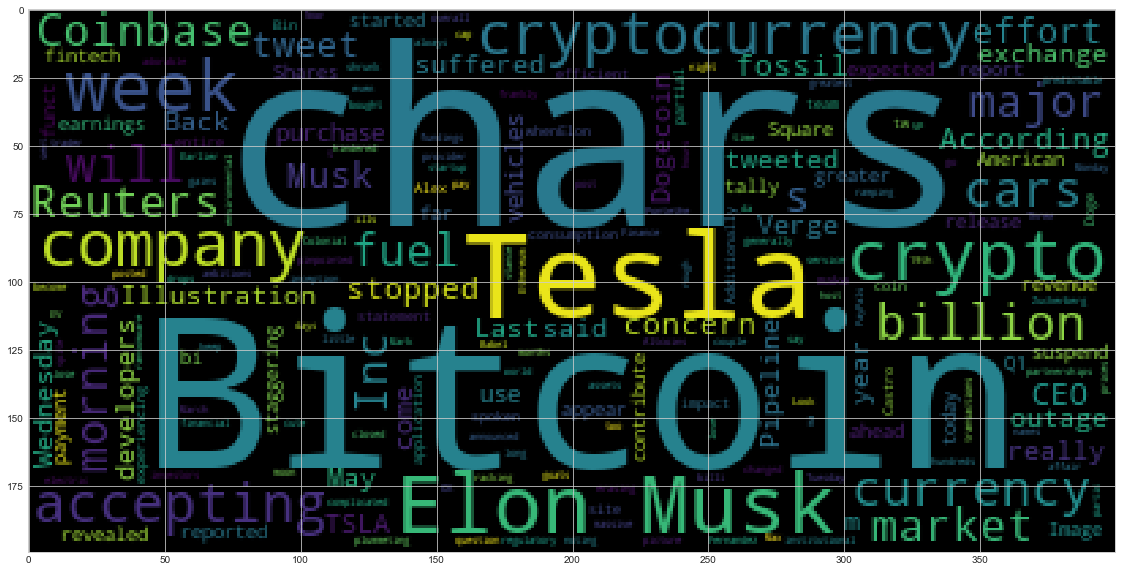

In [78]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
wc = WordCloud().generate(bitcoin_df.text.str.cat())
plt.imshow(wc)

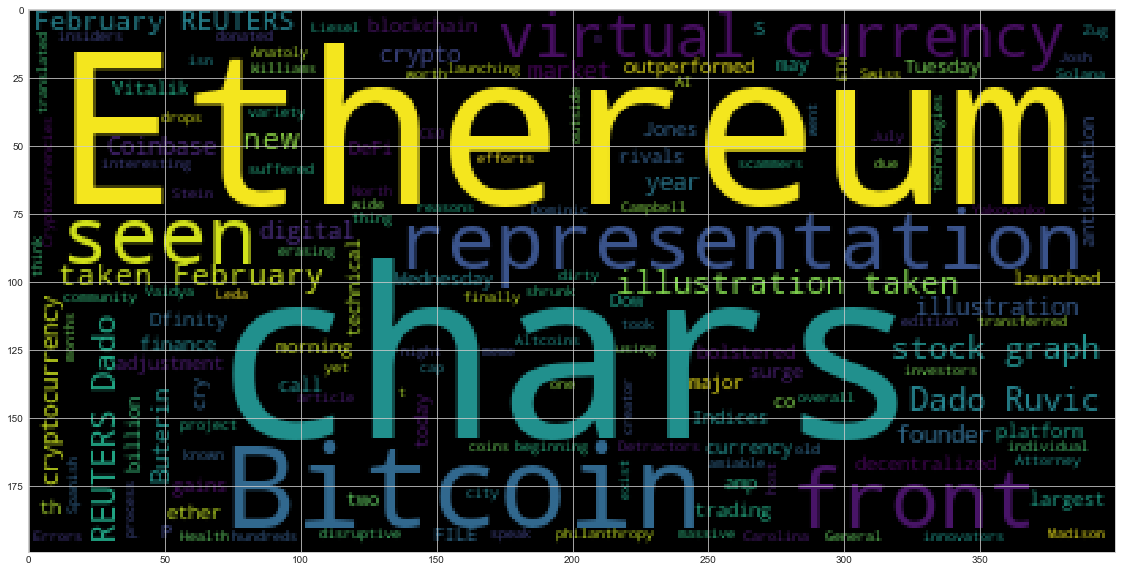

In [80]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
wc = WordCloud().generate(ethereum_df.text.str.cat())
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [81]:
import spacy
from spacy import displacy
import spacy

In [82]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [83]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [84]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
bitcoin_df.text.str.cat()

'Just weeks after Tesla started accepting Bitcoin as currency for cars, Elon Musk revealed in a tweet that it will "suspend" the effort. According to the release (Tesla does not appear to have a funct… [+768 chars]Shares of Square are up more than 6% today after the American fintech company reported a staggering $5.06 billion in revenue in its Q1 2021 earnings report, far ahead of an expected tally of $3.36 bi… [+2045 chars]Image: Tesla\r\n\n \n\n Tesla has stopped accepting bitcoin as payment for its cars out of concern that it will contribute to greater consumption of fossil fuels, according to a statement CEO Elon Musk tw… [+853 chars]Illustration by Alex Castro / The Verge\r\n\n \n\n Cryptocurrency exchange Coinbase is experiencing a “partial” outage this morning for its entire site and application. Additionally, both Coinbase and Bin… [+1307 chars]Last week, whenElon Musk tweeted that he had spoken with the team of Doge developers about how to make the coin more efficient, the imp

In [87]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(bitcoin_df.text.str.cat())

# Add a title to the document
# YOUR CODE HERE!
doc.user_data["title"]  = 'Bitcoin_NER'


In [29]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style='ent')

In [88]:
# List all Entities
# YOUR CODE HERE!
entities = [ent.text for ent in doc.ents]
entities

['Just weeks',
 'Tesla',
 'Bitcoin',
 'Elon Musk',
 'Square',
 'more than 6%',
 'today',
 'American',
 '$5.06 billion',
 '2021',
 '3.36',
 'Tesla',
 'Elon Musk',
 'Alex Castro',
 'The Verge\r\n\n \n\n Cryptocurrency',
 'Coinbase',
 'this morning',
 'Coinbase',
 'Bin',
 '+1307 chars]Last week',
 'Musk',
 'Dogecoin',
 'Zuckerberg',
 'two',
 'Max',
 'Bitcoin',
 'Elon Musk',
 'March',
 'Musk',
 'Tesla',
 'Earlier this year',
 'EV',
 '1.5',
 'Elon Musk',
 'Bitcoin',
 'Bitcoin',
 'Ethereum',
 'Altcoins',
 'Tuesday night',
 'Wednesday',
 'morning',
 'months',
 'hundreds of billions',
 'Babel Finance',
 'Monday',
 'hours-long',
 'this morning',
 'May 19th',
 'PayPals',
 'Wednesday',
 'Jose Fernandez da Pontethe',
 'more than 5,500 miles',
 'the United States',
 'Photo',
 'Michele Doying',
 'Verge',
 'Iran',
 'Last week',
 'Trump',
 'This week',
 'Elon Musk’s',
 'Musk',
 'Dogecoin',
 'Twitter',
 'Australian',
 'London High Court',
 '16',
 'around 4 billion pounds',
 'about $50,000',
 'Asian',
 

---

### Ethereum NER

In [89]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
ethereum_df.text.str.cat()

'Vitalik Buterin, the creator of Ethereum, on Wednesday donated Ethereum and meme coins worth $1.5 billion in one of the largest-ever individual philanthropy efforts.\r\nButerin transferred 500 ETH and … [+1667 chars]Their investors call them disruptive innovators. Detractors like North Carolina Attorney General Josh Stein call them dirty scammers. But Leda Health co-founders Madison Campbell and Liesel Vaidya th… [+8679 chars]Solana isn’t known yet outside of the crypto community. But insiders think the blockchain platform is interesting for a wide variety of reasons, beginning with its amiable founder, Anatoly Yakovenko,… [+7156 chars]Bitcoin, Ethereum and a host of Altcoins suffered massive drops Tuesday night and Wednesday morning, erasing months of gains and hundreds of billions in market cap. The overall crypto market shrunk m… [+1182 chars]It took a while to get here, but Dfinity is finally launching.\xa0\r\nIn July 2018, I went to the Swiss city of Zug to speak to Dominic Willi

In [90]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(ethereum_df.text.str.cat())

# Add a title to the document
# YOUR CODE HERE!
doc.user_data["title"]  = 'Ethereum_NER'

In [91]:
# Render the visualization
displacy.render(doc, style='ent')

In [92]:
# List all Entities
# YOUR CODE HERE!
entities = [ent.text for ent in doc.ents]
entities

['Vitalik Buterin',
 'Ethereum',
 'Wednesday',
 'Ethereum',
 '$1.5 billion',
 'Buterin',
 '500',
 'ETH',
 'North Carolina',
 'Josh Stein',
 'Madison Campbell',
 'Liesel Vaidya',
 'Anatoly Yakovenko',
 'Ethereum',
 'Altcoins',
 'Tuesday night',
 'Wednesday',
 'morning',
 'months',
 'hundreds of billions',
 'Dfinity',
 'July 2018',
 'Swiss',
 'Dominic Williams',
 'Spanish',
 'AI',
 'Cryptocurrencies',
 'today',
 'Vitalik Buterin',
 '27-year-old',
 'February 19, 2021',
 'Dado Ruvic/IllustrationCryptocurrency',
 'Dow Jones Indices',
 'Tuesday',
 'Banksy',
 'Love',
 'Air',
 'first',
 'chars]NEW YORK',
 'May 7',
 'Reuters',
 'this year',
 'this year',
 'this summer',
 '+5218',
 'Reuters',
 'February 19, 2021',
 'SINGAPORE',
 'Ethereum',
 'February 19, 2021',
 'today',
 'April 14',
 'Alex Castro',
 'The Verge\r\n\n \n\n Cryptocurrency',
 'Coinbase',
 'this morning',
 'Coinbase',
 'Bin',
 'Ethereum\r\n',
 'Getty Images',
 'AsiaPac',
 'Bitcoin',
 'Ethereum',
 'number two',
 '2021',
 'February 1

---